# 🤖 Machine Learning: Criação de Nova Grade de Tamanhos
**Objetivo:** Utilizar o algoritmo **K-Means Clustering** para agrupar as clientes em 5 grupos corporais distintos. Ao contrário da tabela tradicional (P/M/G), esses grupos são formados pela proximidade matemática das medidas reais.

Isso nos permitirá criar "Tamanhos Inteligentes" (ex: Tamanho 1, Tamanho 2...) que vestem melhor a população.

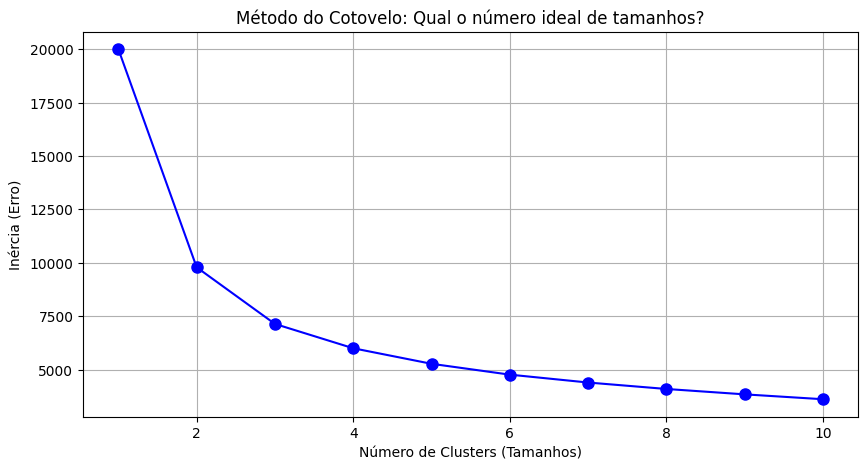

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 1. Carregar Dados
df = pd.read_csv('dados_biotipos_simulados.csv')

# 2. Selecionar apenas as colunas numéricas (A IA não lê texto 'Pera' ou 'Feminino')
X = df[['ombro', 'busto', 'cintura', 'quadril']]

# 3. Padronizar os dados (StandardScaler)
# Importante: Coloca todas as medidas na mesma escala matemática para o algoritmo não se confundir
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Método do Cotovelo (Para decidir o número de clusters)
inertia = []
range_clusters = range(1, 11) # Testar de 1 a 10 grupos

for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# 5. Plotar o Gráfico
plt.figure(figsize=(10, 5))
plt.plot(range_clusters, inertia, 'bo-', markersize=8)
plt.xlabel('Número de Clusters (Tamanhos)')
plt.ylabel('Inércia (Erro)')
plt.title('Método do Cotovelo: Qual o número ideal de tamanhos?')
plt.grid(True)
plt.show()

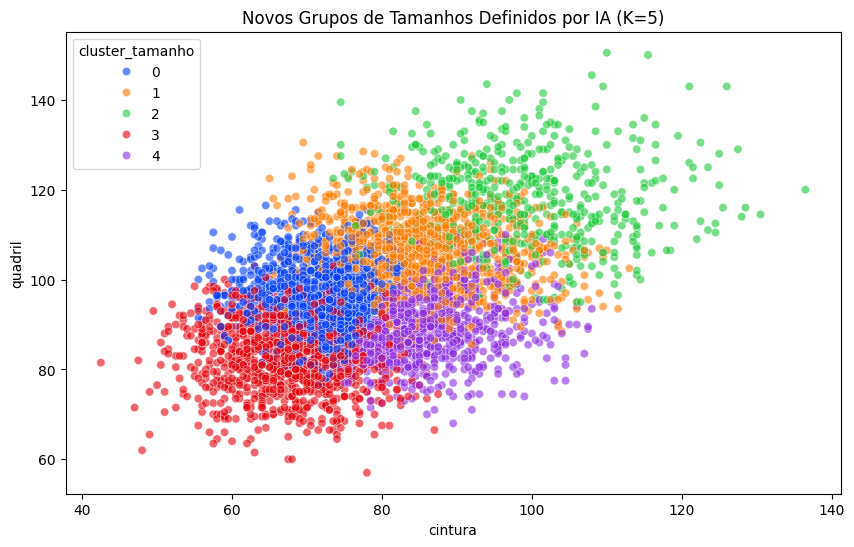

✅ Clusterização concluída! Cada cor no gráfico representa um 'Tamanho Novo'.


In [3]:
# 1. Aplicar o K-Means com 5 Clusters (Tamanhos)
k_ideal = 5
kmeans = KMeans(n_clusters=k_ideal, random_state=42, n_init=10)

# Criamos uma coluna nova chamada 'cluster_tamanho'
df['cluster_tamanho'] = kmeans.fit_predict(X_scaled)

# 2. Visualizar os Grupos (Cintura x Quadril)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='cintura', y='quadril', hue='cluster_tamanho', data=df, palette='bright', alpha=0.6)
plt.title(f'Novos Grupos de Tamanhos Definidos por IA (K={k_ideal})')
plt.show()

print("✅ Clusterização concluída! Cada cor no gráfico representa um 'Tamanho Novo'.")

In [4]:
# Agrupar pelos clusters e tirar a média das medidas
tabela_medidas = df.groupby('cluster_tamanho')[['ombro', 'busto', 'cintura', 'quadril']].mean()

# Ordenar pelo Busto para ficar fácil de ler (do menor para o maior)
tabela_medidas = tabela_medidas.sort_values(by='busto')

print("--- 📏 NOVA TABELA DE MEDIDAS SUGERIDA (EM CM) ---")
print(tabela_medidas.round(1)) # Arredonda para 1 casa decimal

--- 📏 NOVA TABELA DE MEDIDAS SUGERIDA (EM CM) ---
                 ombro  busto  cintura  quadril
cluster_tamanho                                
3                 76.0   80.5     67.7     83.0
4                 83.9   88.6     86.7     89.5
0                 84.7   89.0     71.9     96.4
1                 93.4   98.1     85.2    106.4
2                104.4  109.4     98.9    118.0
